### **PREDICTION**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Output folder
BASE_OUTPUT='/content/drive/MyDrive/Capstone/Prasad/20210115_3_1_Augmented_100ep'

# Dataset folder
dataset_folder='/content/drive/MyDrive/Capstone/car_data/'

In [3]:
import os
import csv
import numpy as np 
import pandas as pd

In [4]:
import tensorflow as tf
import tensorflow as tensorflow

In [5]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [6]:
import cv2
#from google.colab.patches import cv2_imshow
import pickle
import mimetypes
import argparse
import imutils

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
%matplotlib inline
import seaborn as sn

In [8]:
from google.colab.patches import cv2_imshow

In [9]:
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "detector.h5"])
LB_PATH = os.path.sep.join([BASE_OUTPUT, "lb.pickle"])

In [10]:
#For prediction
# load out obejct dectector and label binarizer from disk 
print("[INFO] loading object detector...")

model=load_model(MODEL_PATH)
lb=pickle.loads(open(LB_PATH, 'rb').read())

[INFO] loading object detector...


In [11]:
#imagePath= dataset_folder+'test/Bentley Arnage Sedan 2009/00277.jpg'
#imagePath= dataset_folder+'test/Ram C-V Cargo Van Minivan 2012/07099.jpg'
#imagePath= dataset_folder+'test/Ford F-150 Regular Cab 2012/04435.jpg'
imagePath= dataset_folder+'test/Jeep Wrangler SUV 2012/05279.jpg'
print(imagePath)

/content/drive/MyDrive/Capstone/car_data/test/Jeep Wrangler SUV 2012/05279.jpg


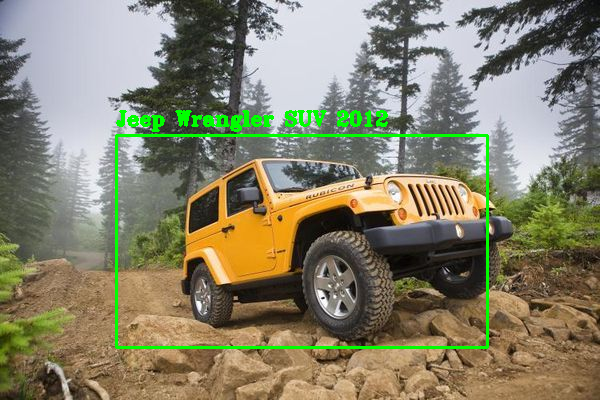

---------------------
Original Car Name: Jeep Wrangler SUV 2012

Top 5 Predicted Car Names:
---------------------
Jeep Wrangler SUV 2012
HUMMER H2 SUT Crew Cab 2009
HUMMER H3T Crew Cab 2010
Ford Expedition EL SUV 2009
Jeep Liberty SUV 2012


In [12]:
image1 = load_img(imagePath, target_size=(224, 224))
image1 = img_to_array(image1) / 255.0
image1 = np.expand_dims(image1, axis=0)

carname=imagePath.split('/')[-2]
#print('Original Car Name:', carname)
	# predict the bounding box of the object along with the class
	# label
(boxPreds, labelPreds) = model.predict(image1)
(startX, startY, endX, endY) = boxPreds[0]

	# determine the class label with the largest predicted
	# probability
i = np.argmax(labelPreds, axis=1)
label = lb.classes_[i][0]


	# load the input image (in OpenCV format), resize it such that it
	# fits on our screen, and grab its dimensions
image2 = cv2.imread(imagePath)
image2 = imutils.resize(image2, width=600)
(h, w) = image2.shape[:2]

	# scale the predicted bounding box coordinates based on the image
	# dimensions
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)

# draw the predicted bounding box and class label on the image
y = startY - 10 if startY - 10 > 10 else startY + 10

cv2.rectangle(image2, (startX, startY), (endX, endY),
		(0, 255, 0), 2)

cv2.putText(image2, label, (startX, y), cv2.FONT_HERSHEY_TRIPLEX,
		0.65, (0, 255, 0), 2)

# show the output image
cv2_imshow( image2)
cv2.waitKey(0)

print('---------------------')
print('Original Car Name:', carname)

print('')
print("Top 5 Predicted Car Names:")
print('---------------------')

top5_predictions = np.argsort(labelPreds, axis=1)[:,-5:]

for i in range(len(top5_predictions[0])):
    print(lb.classes_[top5_predictions[0][-i-1]])
#for i in range(1,6):
#    print(lb.classes_[top5_predictions[0][-i]])    

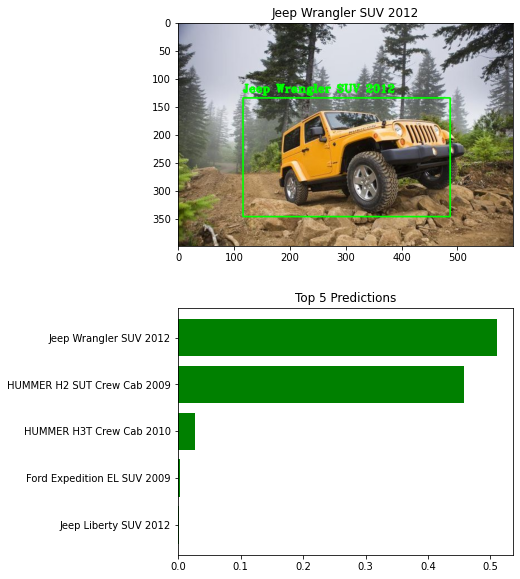

In [13]:
top5_predictions = np.argsort(labelPreds, axis=1)[:,-5:]

names = []
for i in range(1,6):
  names += [lb.classes_[top5_predictions[0][-i]]]

probs = np.sort(labelPreds)[:,-5:][0][::-1]

# Plotting test image and predicted probabilites
f, ax = plt.subplots(2,figsize = (6,10))

ax[0].imshow(image2[...,::-1])
ax[0].set_title(carname)

y_names = np.arange(len(names))
ax[1].barh(y_names, probs/probs.sum(), color='green')
ax[1].set_yticks(y_names)
ax[1].set_yticklabels(names)
ax[1].invert_yaxis() 
ax[1].set_title('Top 5 Predictions')

plt.show()

## References:

https://github.com/wengsengh/Car-Models-Classifier/blob/master/car_models_classifier.ipynb